# Introduction
"""
Project Overview:
This project aims to analyze a large dataset of men's shoes to uncover trends, opportunities, and insights.
Advanced statistical techniques and machine learning models are applied to support data-driven decision-making.

Objectives:
1. Analyze sales data to identify trends and key performance metrics.
2. Develop predictive models to forecast sales and optimize pricing strategies.
3. Provide actionable recommendations for marketing, inventory, and pricing strategies.

Steps Taken:
1. Data Collection and Preparation:
   - Loaded the dataset and performed data cleaning and preprocessing.
   - Handled missing values and encoded categorical variables.

2. Exploratory Data Analysis (EDA):
   - Conducted descriptive analysis to understand data distributions.
   - Created visualizations to identify trends and patterns.

3. Regression Analysis:
   - Applied multiple regression models (Linear Regression, Random Forest, Gradient Boosting) to predict sales.
   - Evaluated model performance using Mean Squared Error (MSE) and R-squared metrics.

4. Pricing Strategy:
   - Added columns for 'Predicted_Sales' and 'Pricing_Strategy' based on model predictions.
   - Compared the effectiveness of different pricing strategies.

Conclusion:
- By analyzing the table, we can determine which products are expected to perform better (High pricing strategy).
- Adjust marketing, inventory, and pricing strategies accordingly to maximize revenue and manage resources efficiently.

"""


In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


!pip install xgboost

In [298]:

######    Data Collection and Preparation ##########


data = pd.read_csv("MEN_SHOES.csv")

data.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


In [299]:
data.describe()

,RATING
count,23940.000000
mean,3.836667
std,0.410686
min,2.400000
25%,3.600000
50%,4.000000
75%,4.000000
max,4.600000


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


In [301]:
data.shape

(23940, 5)

In [302]:
# Finding missing values 

data.isnull().sum()

Brand_Name           0
How_Many_Sold        0
Current_Price      798
Product_details      0
RATING               0
dtype: int64

In [313]:
# Handle missing values by filling with median
data['Current_Price'].fillna(data['Current_Price'].median(), inplace=True)


/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_42102/328502353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Current_Price'].fillna(data['Current_Price'].median(), inplace=True)


In [249]:
data.dtypes

Brand_Name          object
How_Many_Sold       object
Current_Price       object
Product_details     object
RATING             float64
dtype: object

In [303]:
column_names = data.columns
column_names

Index(['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details',
       'RATING'],
      dtype='object')

In [304]:
# Handle duplicates

print(data.drop_duplicates(inplace=True))

None


In [305]:
# Identify categorical variables

categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical variables

print("Categorical Variables:")
print(categorical_variables)

Categorical Variables:
['Brand_Name', 'How_Many_Sold', 'Current_Price', 'Product_details']


In [306]:

#Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_variables, drop_first=True)


In [307]:
# Identify numerical variables

numeric_variables = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical variables

print("Numerical Variables:")
print(numeric_variables)

Numerical Variables:
['RATING']


In [308]:


# Convert 'How_Many_Sold' to numeric, remove commas

data['How_Many_Sold'] = pd.to_numeric(data['How_Many_Sold'].str.replace(',', ''), errors='coerce')



In [201]:
# Ensure no remaining non-numeric values in 'How_Many_Sold'

data['How_Many_Sold'].fillna(0, inplace=True)

/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_42102/2827074884.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['How_Many_Sold'].fillna(0, inplace=True)


In [309]:
# Ensure no remaining non-numeric values in 'How_Many_Sold'

data['How_Many_Sold'].fillna(0, inplace=True)



/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_42102/554288358.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['How_Many_Sold'].fillna(0, inplace=True)


In [310]:
#Convert 'Current_Price' to numeric, remove '₹' symbol and commas

data['Current_Price'] = pd.to_numeric(data['Current_Price'].str.replace('₹', '').str.replace(',', ''), errors='coerce')


In [311]:
# Ensure correct data types for'RATING'

data['RATING'] = pd.to_numeric(data['RATING'], errors='coerce')


In [312]:
# Finding missing values 

#data.isnull().sum()

Brand_Name         0
How_Many_Sold      0
Current_Price      2
Product_details    0
RATING             0
dtype: int64

In [260]:
# Handle missing values by filling with median
#data['Current_Price'].fillna(data['Current_Price'].median(), inplace=True)


/var/folders/yk/bhn8qs_94hb7nj2wx3cvz1y00000gn/T/ipykernel_42102/328502353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Current_Price'].fillna(data['Current_Price'].median(), inplace=True)


In [261]:
###### Verify the changes #######

data.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,2242,1098.0,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,674.0,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,16662,588.0,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,599.0,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,982.0,Men's Velocity Runner Lp Running Shoe,4.0


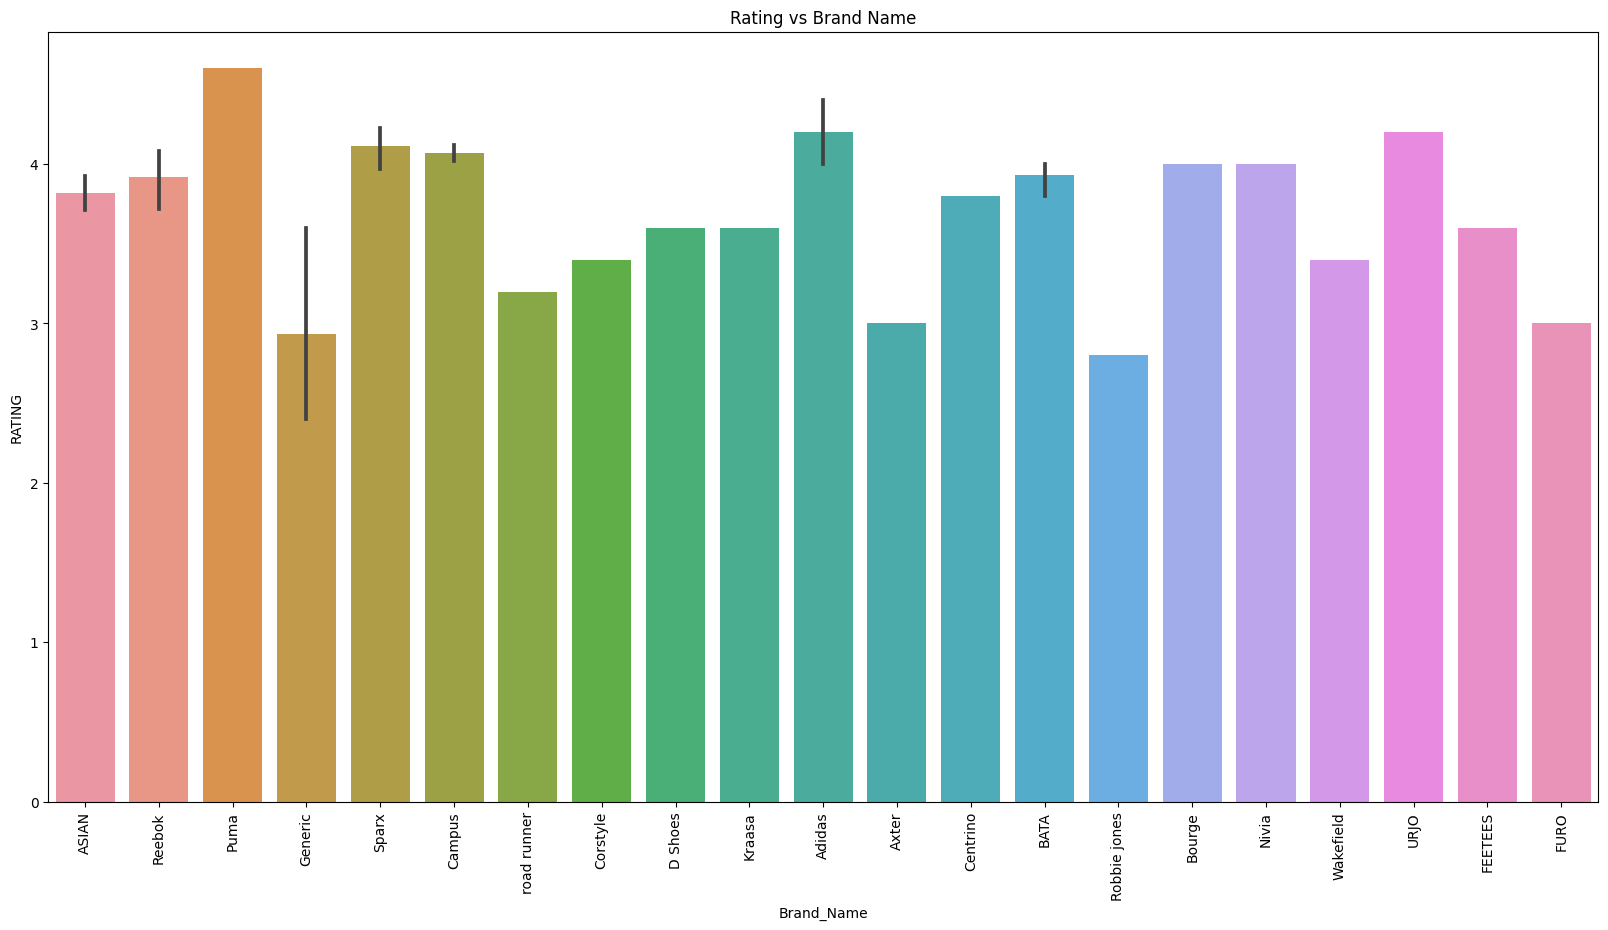

In [315]:
# which brand has max rating 

plt.figure(figsize = (20,10))
sns.barplot(x = 'Brand_Name',
            y = 'RATING',            
            data = data).set(title = "Rating vs Brand Name");
plt.xticks(rotation = 90)
plt.show()

In [316]:
# PUMA has maximum rating and what is the value?


max_rating = data['RATING'].max()
brand_max_rating= data.loc[data['RATING'] == data['RATING'].max(), 'Brand_Name'].iloc[0]

print(brand_max_rating,'has maximum rating of', max_rating)

Puma has maximum rating of 4.6


In [317]:
# which brands are popular

most_popular_brand = data.groupby('Brand_Name')[['How_Many_Sold']].sum().reset_index()
most_popular_brand_sorted = most_popular_brand.sort_values(by='How_Many_Sold', ascending=False)
most_popular_brand_sorted

,Brand_Name,How_Many_Sold
0,ASIAN,103115
17,Sparx,45583
4,Bourge,18747
5,Campus,14913
12,Kraasa,7002
3,BATA,5945
1,Adidas,5314
15,Reebok,3114
8,D Shoes,1490
13,Nivia,954


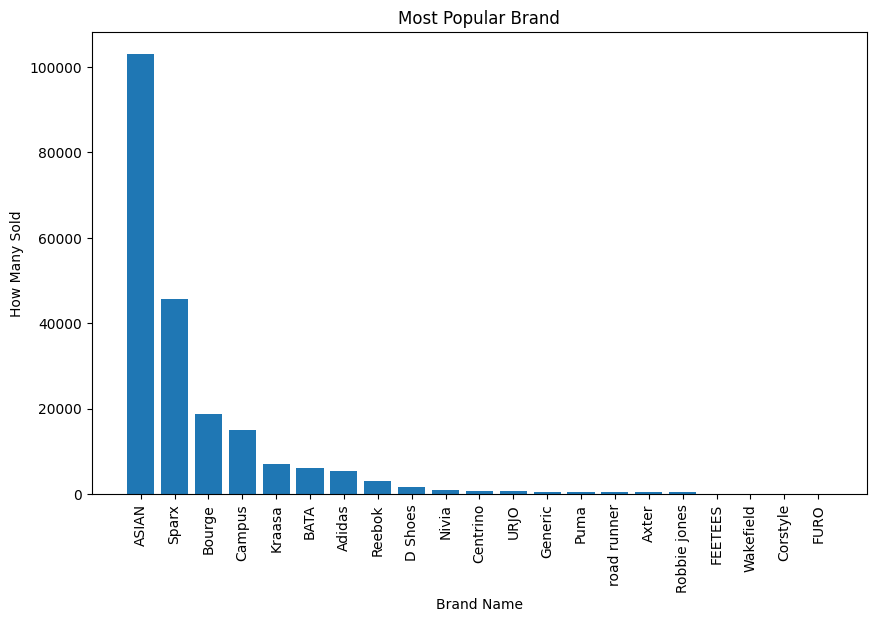

In [318]:


plt.figure(figsize=(10, 6))

plt.bar(most_popular_brand_sorted['Brand_Name'], most_popular_brand_sorted['How_Many_Sold'])
plt.xlabel('Brand Name')
plt.ylabel('How Many Sold')
plt.title('Most Popular Brand')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

In [319]:
# which brand sold maximum 

max_shoes_sold = data['How_Many_Sold'].max()
max_sold_brand = data.loc[data['How_Many_Sold'] ==  max_shoes_sold]
max_sold_brand

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
6,ASIAN,72611,498.0,Men's Wonder-13 Sports Running Shoes,4.0


In [320]:

# which brand sold minimum 

least_shoes_sold = data['How_Many_Sold'].min()
least_sold_brand = data.loc[data['How_Many_Sold'] ==  least_shoes_sold]
least_sold_brand

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
59,FURO,2,1299.0,Low Ankle Running Sports Shoes for Men (O-5033),3.0


In [229]:
# average price for each brand 

average_data = data.dropna()
brand_avg_price = average_data.groupby('Brand_Name')[['Current_Price']].mean().reset_index()
brand_avg_price

,Brand_Name,Current_Price
0,ASIAN,702.090909
1,Adidas,1884.000000
2,Axter,231.000000
3,BATA,832.333333
4,Bourge,699.000000
5,Campus,897.916667
6,Centrino,759.000000
7,Corstyle,579.000000
8,D Shoes,649.000000
9,FEETEES,349.000000


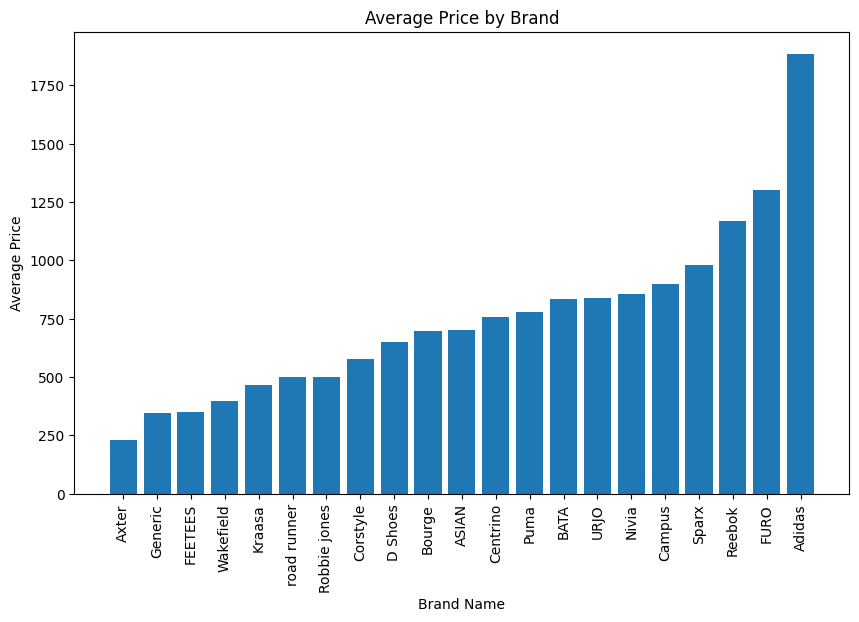

In [321]:


# Calculate the average price for each brand
average_price_by_brand = data.groupby('Brand_Name')['Current_Price'].mean().reset_index()

# Sort the DataFrame in ascending order by 'Current_Price'
average_price_by_brand_sorted = average_price_by_brand.sort_values(by='Current_Price', ascending=True)

# Plot the average price by brand
plt.figure(figsize=(10, 6))
plt.bar(average_price_by_brand_sorted['Brand_Name'], average_price_by_brand_sorted['Current_Price'])
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()




In [322]:
# which brand has most expensive shoe

max_shoes_price = data['Current_Price'].max()
max_priced_product = data.loc[data['Current_Price'] ==  max_shoes_price]
max_priced_product

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
50,Adidas,206,2159.0,Men's Skadi Shoes,4.4


In [323]:
# which brand has cheapest shoe
least_shoes_price = data['Current_Price'].min()
least_priced_product = data.loc[data['Current_Price'] ==  least_shoes_price]
least_priced_product

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
34,Axter,350,231.0,"Men-9064 Grey Top Best Rates,Sports Shoes,Runn...",3.0


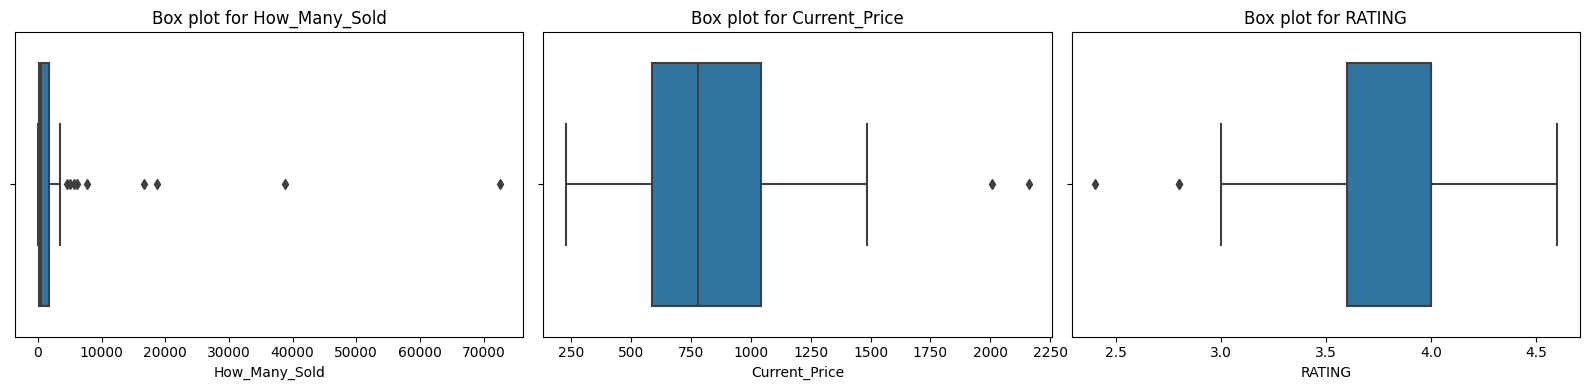

In [270]:
#Determine any outlier values(records)for numeric attributes and create box plots 



# Select numeric attributes
numeric_attributes = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows needed for the subplots

num_attributes = len(numeric_attributes)
num_rows = (num_attributes // 3) + (num_attributes % 3 > 0)

# Create box plots for numeric attributes

plt.figure(figsize=(16, 4 * num_rows))
for i, column in enumerate(numeric_attributes, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Box plot for {column}')

plt.tight_layout()
plt.show()

/Users/zhila/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


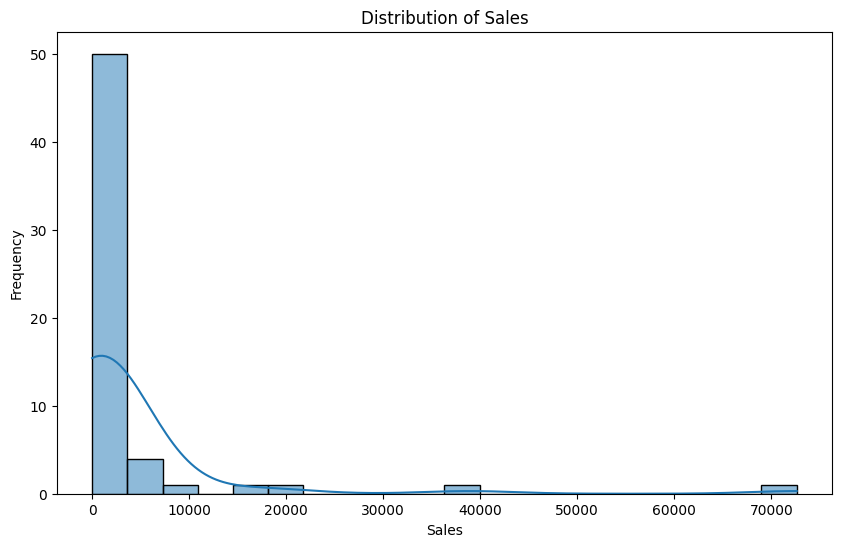

In [271]:
plt.figure(figsize=(10,6))
sns.histplot(data['How_Many_Sold'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


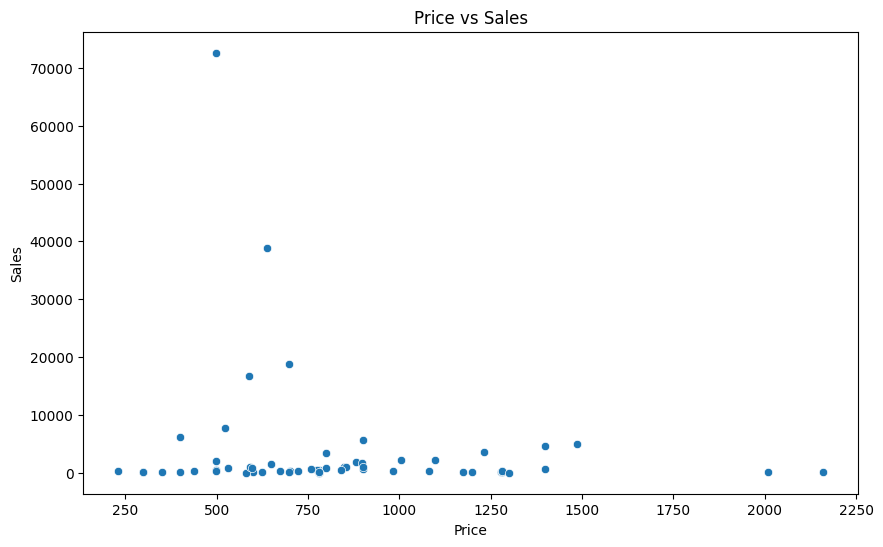

In [272]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Current_Price', y='How_Many_Sold')
plt.title('Price vs Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.show()


In [273]:
# Select only numerical columns

correlation_matrix = numeric_data.corr()
correlation_matrix

,How_Many_Sold,Current_Price,RATING
How_Many_Sold,1.000000,-0.156226,0.130459
Current_Price,-0.156226,1.000000,0.452585
RATING,0.130459,0.452585,1.000000


In [ ]:
### Higher prices correlate slightly with fewer sales.
### Products with higher ratings tend to sell slightly more.
### There's a moderate correlation between higher prices and higher ratings, suggesting perceived quality or value.

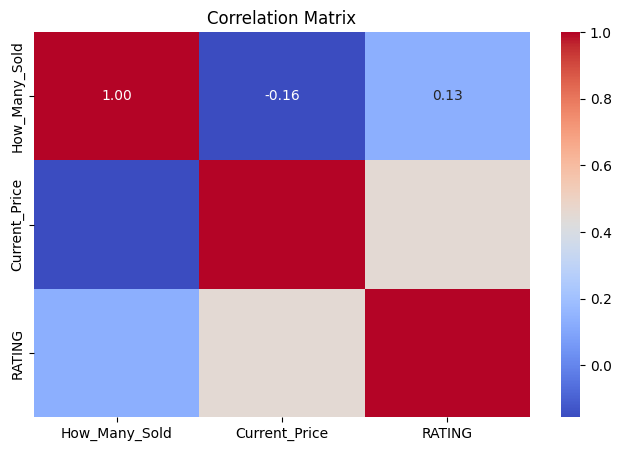

In [274]:
# Plot correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [275]:
######    Performance Metrics Development and Analysis ########


# Example metrics
mean_price = data['Current_Price'].mean()
total_sales = data['How_Many_Sold'].sum()
mean_rating = data['RATING'].mean()

print(f"Mean Price: {mean_price:.2f}")
print(f"Total Sales: {total_sales}")
print(f"Mean Rating: {mean_rating:.2f}")


Mean Price: 842.97
Total Sales: 209585
Mean Rating: 3.83


In [177]:
 #########  prediction with  Machine Learning Techniques #########
    
# 1) Regression Analysis  
# 2) Gradient Boosting Regressor
# 3) RandomForestRegressor
# 4)  XGBoost

In [276]:

#1 ) Regression Analysis 

# Define features (X) and target variable (y)
X = data[['Current_Price', 'RATING']]
y = data['How_Many_Sold']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
    

Mean Squared Error: 49406986.44
R-squared: -0.92


In [ ]:
### The regression model has a high mean squared error and a negative R-squared value, 
### indicating poor performance in predicting shoe sales based on the provided features.

In [279]:
# 2)  Initialize Gradient Boosting Regressor



#Select features and target variable
X = data[['Current_Price', 'RATING']]
y = data['How_Many_Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_regressor.predict(X_test)

# Evaluate model performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 41837776.840269394
R-squared: -0.63


In [237]:

# 3)  Initialize Random Forest Regressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features and target variable
X = data[['Current_Price', 'RATING']]
y = data['How_Many_Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate model performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 39787743.94812171
R-squared: -0.55


In [283]:
# 4)  Initialize using XGBoost

# Encode categorical variables
categorical_variables = ['Brand_Name', 'Product_details']
data_encoded = pd.get_dummies(data, columns=categorical_variables, drop_first=True)

# Define features (X) and target variable (y)
X = data_encoded[['Current_Price', 'RATING'] + [col for col in data_encoded.columns if col.startswith('Brand_Name_') or col.startswith('Product_details_')]]
y = data_encoded['How_Many_Sold']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Mean Squared Error:", mse)
print(f"XGBoost R-squared: {r2:.2f}")



XGBoost Mean Squared Error: 32745809.93855423
XGBoost R-squared: -0.27


In [329]:
# Conclusion

print("\nConclusion:")
print("The XGBoost model is a better model here.")
print("It has lower Mean Squared Error (MSE) and higher R-squared values, indicating stronger predictive capability.")



Conclusion:
The XGBoost model is a better model here.
It has lower Mean Squared Error (MSE) and higher R-squared values, indicating stronger predictive capability.


In [288]:
# adding  'Predicted_Sales' column to capture model predictions
# adding  'Pricing_Strategy'column to categorize products based on their predicted sales


data['Predicted_Sales'] = xgb_regressor.predict(X)

# Determine the median of the predicted sales
median_predicted_sales = data['Predicted_Sales'].median()

# Determine pricing strategy based on predicted sales
data['Pricing_Strategy'] = ['High' if sales > median_predicted_sales else 'Low' for sales in data['Predicted_Sales']]


In [292]:
# verify the changes 
data.head(10)

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING,Predicted_Sales,Pricing_Strategy
0,ASIAN,2242,1098.0,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8,98.537003,Low
1,ASIAN,240,674.0,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0,244.023270,Low
2,ASIAN,16662,588.0,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8,16658.156250,High
3,ASIAN,135,599.0,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0,1083.218750,High
4,Reebok,240,982.0,Men's Velocity Runner Lp Running Shoe,4.0,243.557343,Low
5,Puma,455,779.0,Men's Softride Enzo Nxt Walking Shoe,4.6,2134.082275,High
6,ASIAN,72611,498.0,Men's Wonder-13 Sports Running Shoes,4.0,72607.031250,High
7,Generic,84,298.0,Men's Mesh Lace-Ups Running/Walking/Gym/Sports...,2.4,84.605316,Low
8,Sparx,1795,880.0,Men's Sm-677 Running Shoe,4.0,1791.719727,High
9,Generic,309,439.0,B.R.K. Men's Denim Casual Shoe,3.6,312.850159,Low


In [333]:
print("\nConclusion:")

print("""By analyzing the table, we can determine which products are expected to perform better (High pricing strategy),
we can adjust the marketing, inventory, and pricing strategies accordingly to maximize revenue and manage resources efficiently.""")




Conclusion:
By analyzing the table, we can determine which products are expected to perform better (High pricing strategy),
we can adjust the marketing, inventory, and pricing strategies accordingly to maximize revenue and manage resources efficiently.
